## INSURANCE EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isnull().mean()*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [7]:
data.duplicated().sum()

1

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(1337, 7)

In [12]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### EDA
#### Multi Variate Analysis

#### Count Plot

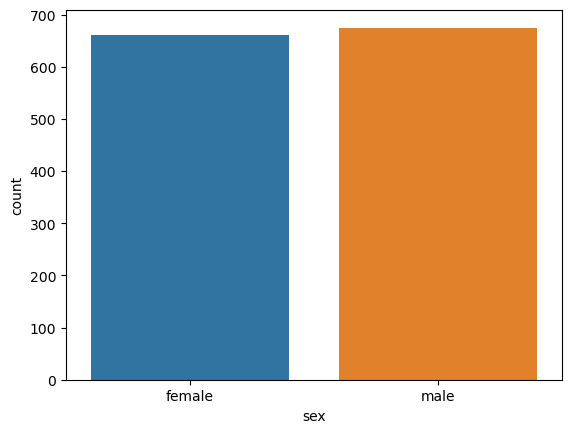

In [13]:
sns.countplot(x='sex', data=data);

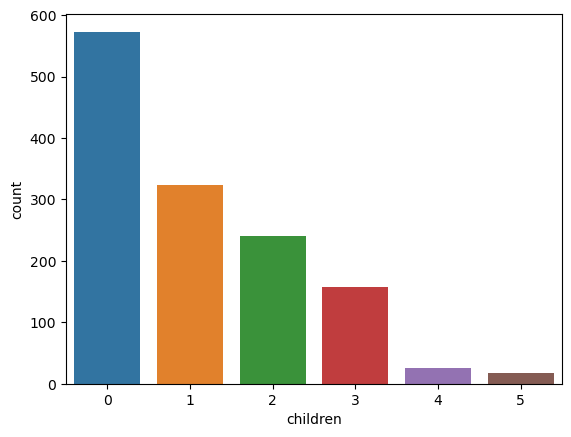

In [14]:
sns.countplot(x='children', data=data);

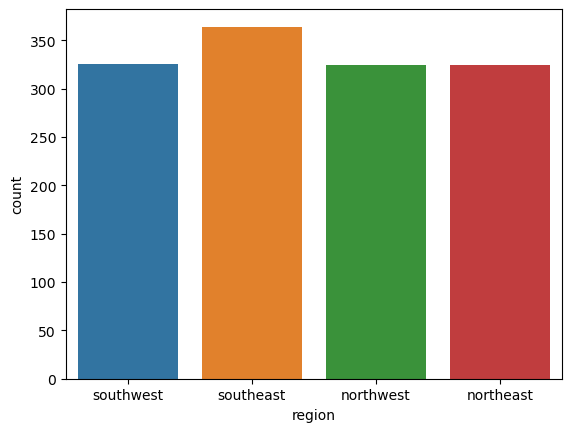

In [15]:
sns.countplot(x='region', data=data);

#### Line Plot

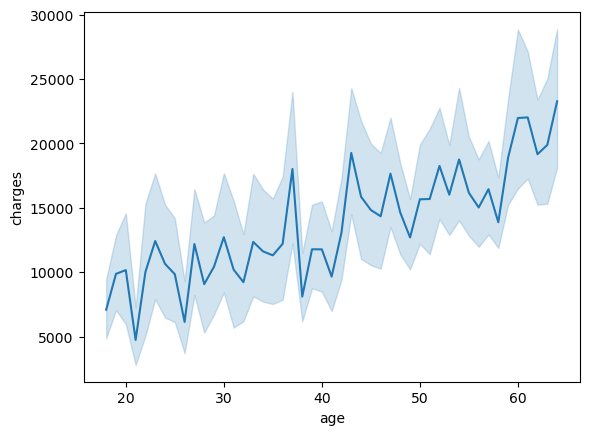

In [16]:
sns.lineplot(x='age', y='charges', data=data);

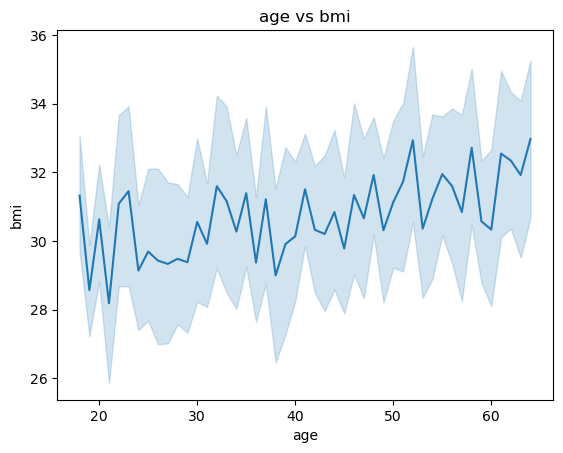

In [17]:
sns.lineplot('age', 'bmi', data=data)
plt.title("age vs bmi")
plt.show()

#### Bar Plot

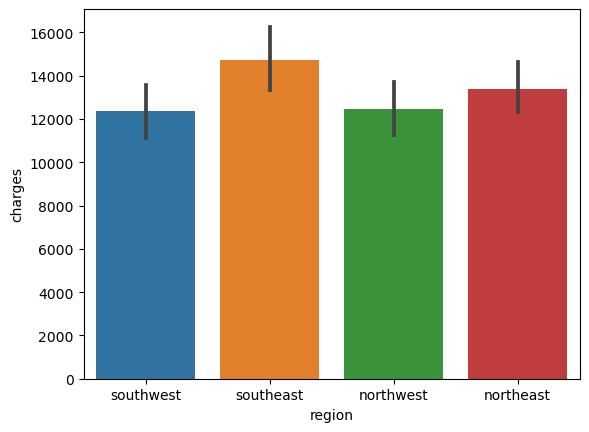

In [18]:
sns.barplot(x='region', y='charges', data=data);

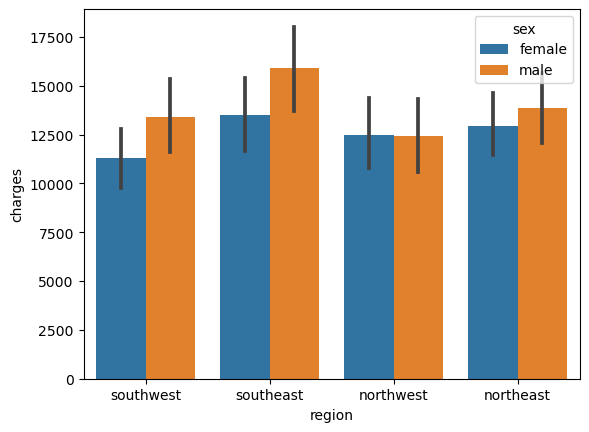

In [19]:
sns.barplot(x='region', y='charges', hue='sex', data=data);

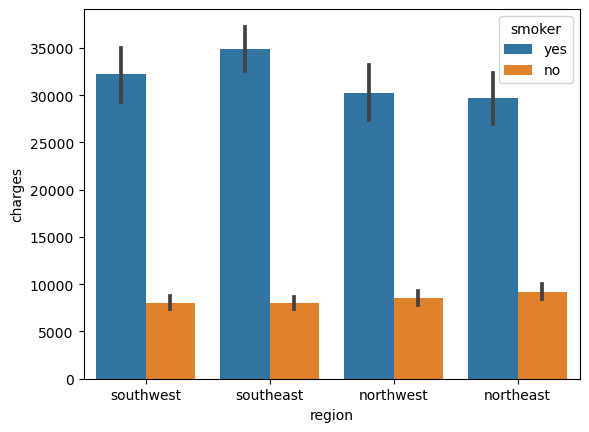

In [20]:
sns.barplot(x='region', y='charges', hue='smoker', data=data);

#### Pie Chart

In [21]:
region_charges = data.groupby(['region'])['charges'].sum()

In [22]:
region_charges

region
northeast    4.343669e+06
northwest    4.034072e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

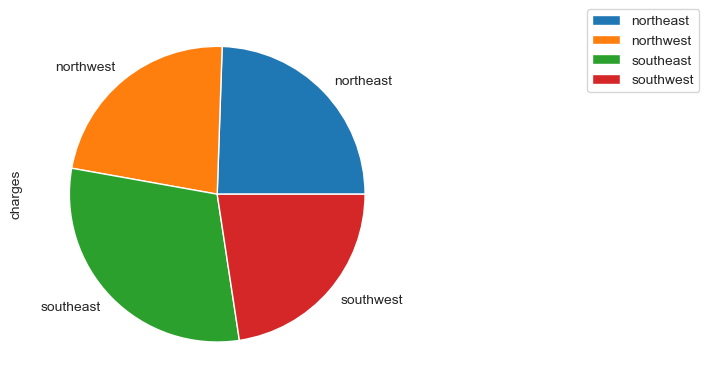

In [23]:
sns.set_style('ticks')
region_charges.plot.pie()
plt.legend(bbox_to_anchor=(1.5,1), loc= 'upper left', borderaxespad=0)
plt.show()

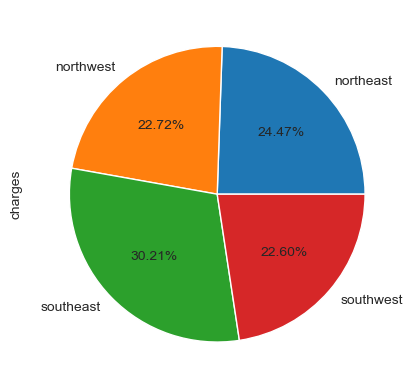

In [24]:
region_charges.plot.pie(autopct = '%1.2f%%')
plt.show()

#### Factor Plot

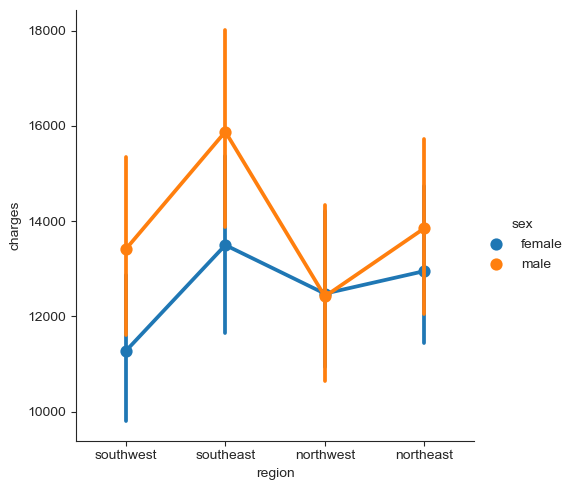

In [25]:
sns.set_style('ticks')
sns.factorplot('region', 'charges', hue='sex', data=data)
plt.show()

#### Violin Plot

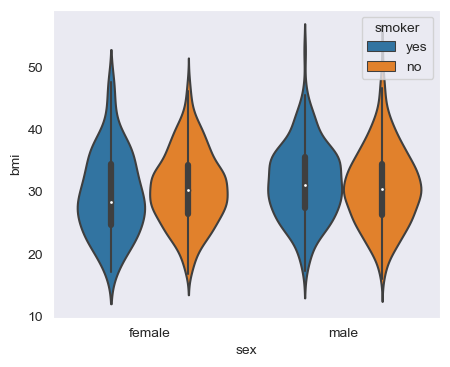

In [26]:
sns.set_style('dark')
plt.figure(figsize=(5,4))
sns.violinplot("sex", "bmi", hue="smoker", data=data)
plt.show()

### Univariate Analysis

#### KDE Plot

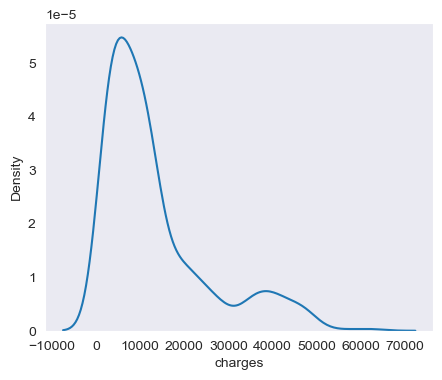

In [27]:
plt.figure(figsize=(5,4))
sns.kdeplot(data=data.charges)
plt.show()

#### Hist Plot

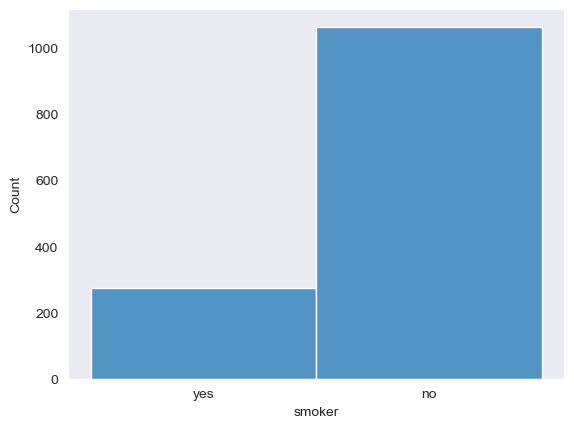

In [28]:
sns.histplot(data.smoker)
plt.show()

#### Box Plot

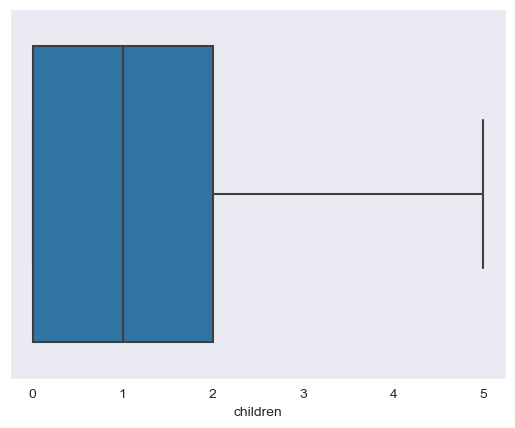

In [29]:
sns.boxplot('children', data=data)
plt.show()

## DESCRIPTIVE METHOD

In [30]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


####  1. The region with maximum amount of smokers present

In [31]:
data_smoker = data.query("smoker == 'yes'")

In [32]:
data_smoker.region.value_counts()

southeast    91
northeast    67
southwest    58
northwest    58
Name: region, dtype: int64

#### Ans: Southeast


#### 2.  The region with highest insurance charge

In [33]:
region_charges = data.groupby(["region"])["charges"].sum()

In [34]:
region_charges

region
northeast    4.343669e+06
northwest    4.034072e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

#### Ans: Southeast


#### 3. The gender who take more insurance

In [35]:
data.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

#### Ans: Male


#### 4. Which gender category have more smokers

In [36]:
sex_smoker = data.query("smoker == 'yes'")
sex_smoker.sex.value_counts()

male      159
female    115
Name: sex, dtype: int64

#### Ans: Male


#### 5. The region with maximum no of children present

In [37]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [38]:
region_childrens = data.groupby(["region"])["children"].sum()

In [39]:
region_childrens

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

#### Ans: Southeast


#### 6. which age category have high bmi value

In [40]:
age_bmi = data.query("age <=30  & smoker == 'yes' & children == 1 &sex=='male'")

In [41]:
age_bmi 

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
82,22,male,37.620,1,yes,southeast,37165.16380
105,20,male,28.025,1,yes,northwest,17560.37975
689,27,male,31.130,1,yes,southeast,34806.46770
1026,19,male,26.030,1,yes,northwest,16450.89470
1047,22,male,52.580,1,yes,southeast,44501.39820
1170,18,male,27.360,1,yes,northeast,17178.68240


In [42]:
age_bmi .value_counts()

age  sex   bmi     children  smoker  region     charges    
18   male  27.360  1         yes     northeast  17178.68240    1
19   male  26.030  1         yes     northwest  16450.89470    1
20   male  28.025  1         yes     northwest  17560.37975    1
22   male  37.620  1         yes     southeast  37165.16380    1
           52.580  1         yes     southeast  44501.39820    1
27   male  31.130  1         yes     southeast  34806.46770    1
28   male  36.400  1         yes     southwest  51194.55914    1
dtype: int64

In [43]:
data.bmi.value_counts()

32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64

In [44]:
bmi_high=data.bmi.max()

In [45]:
bmi_high

53.13

In [46]:
bmi = data.query("bmi == 53.13")

In [47]:
bmi

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627


#### Ans: 18